# **Data Pre Processing with Feature Slection**

In [1]:
##### Standard Libraries #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context ("poster")
%matplotlib inline
## ### For Preprocessing #####
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import chi2,SelectKBest,f_classif
from imblearn.over_sampling import SMOTE
##### For Building the Model #amen
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
##### For Validation of the Model *****
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/content/vgsalesGlobale.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

so here we have null values in Year and Publisher features and we should deal with them

In [7]:
df.Year = df.Year.fillna(df.Year.mean()) #fill null values (numerical) using mean
df.Year

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [8]:
df.Year.isnull().sum()

0

In [9]:
df.Publisher =df.Publisher.fillna(df.Publisher.mode()[0]) #fill null values (string) using mode
df.Publisher

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16598, dtype: object

In [10]:
#after dealing with null values let's discover if there still any null values:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.drop(columns=["Name","Platform"], inplace=True)
df.head()

,Rank,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
df.shape

(16598, 9)

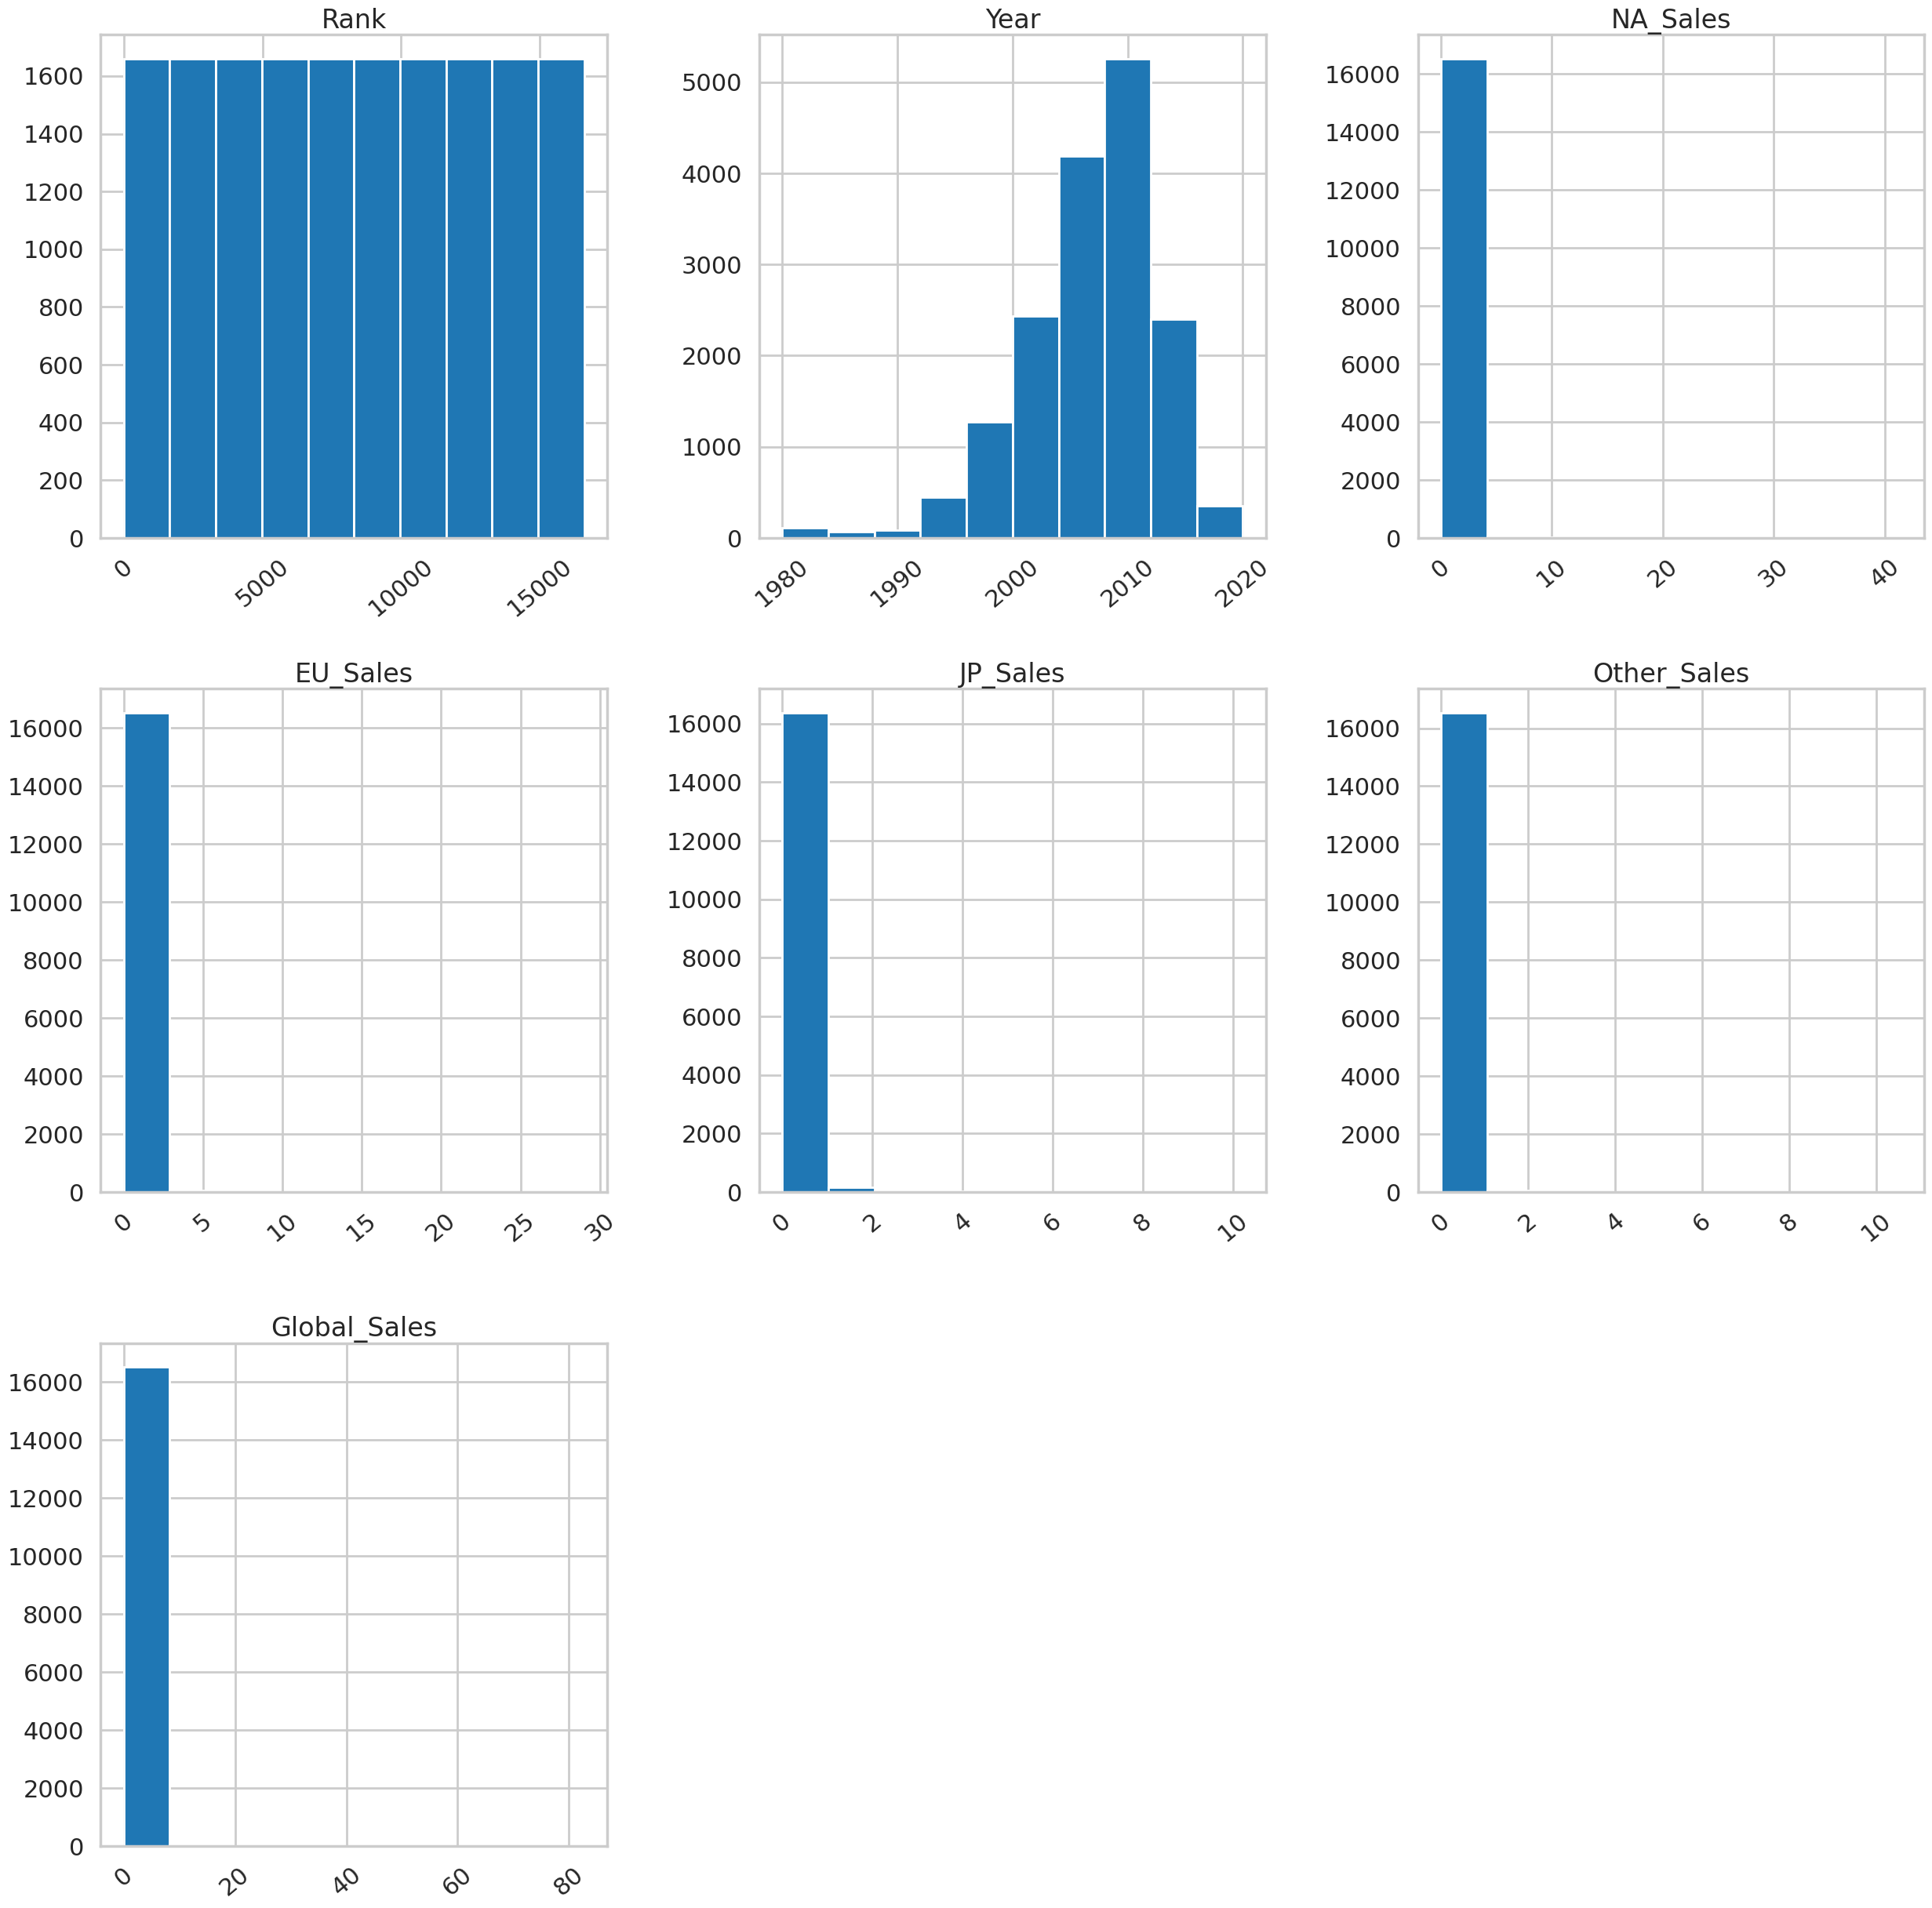

In [14]:
df.hist(figsize=(30,30), xrot=40)
plt.show()

In [15]:
#hotEncoder for some features
encoder = LabelEncoder()
df["Genre"] = encoder.fit_transform(df["Genre"])
df["Publisher"] = encoder.fit_transform(df["Publisher"])
df

,Rank,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,4,269,0.01,0.00,0.00,0.00,0.01
16594,16597,2003.0,8,241,0.01,0.00,0.00,0.00,0.01
16595,16598,2008.0,6,21,0.00,0.00,0.00,0.00,0.01
16596,16599,2010.0,5,8,0.00,0.01,0.00,0.00,0.01


In [16]:
#determinr the target and predictor
x = df.drop("Global_Sales", axis=1)
y = df["Global_Sales"]

In [17]:
df_results = pd.DataFrame(columns = ["Predictor/s","R2","MAE","MSE","RMSE","Cross-Val mean"])

In [18]:
#train_test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=48)
print("X_train size",x_train.shape)
print("Y_train size",x_test.shape)
print("X_test size",y_train.shape)
print("Y_test size",y_test.shape)

X_train size (13278, 8)
Y_train size (3320, 8)
X_test size (13278,)
Y_test size (3320,)


# **1-Ridge Regression Model**

In [19]:
#linear Regression Function
def RidgeModel(xtrain, xtest):
  #linear Regression Function
  RidgeReg = Ridge()
  #fit the data
  RidgeReg.fit(xtrain, y_train)
  #Evaluate the model
  y_pred = RidgeReg.predict(xtest)

  print("R2:", r2_score(y_pred, y_test))
  print("MAE:", mean_absolute_error(y_pred, y_test))
  print("MSE:", mean_squared_error(y_pred, y_test))
  print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

  f, ax = plt.subplots(figsize=(11,9))
  plt.scatter(y_pred, y_test)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Actual vs. Predicted")

  return {"R2: ": r2_score(y_pred, y_test)*100,
          "MAE: ": mean_absolute_error(y_pred, y_test),
          "MSE: ": mean_squared_error(y_pred, y_test),
          "RMSE: ": np.sqrt(mean_squared_error(y_pred, y_test))
          }

R2: 0.9999908565986158
MAE: 0.003010461827581031
MSE: 2.6917593908896915e-05
RMSE: 0.005188216833257542
Cross-Val Results [-3.77374328e-01 -1.15152255e+01 -1.27437026e+02 -2.70938087e+02
 -3.91044686e+02 -3.47182698e+02 -1.00247472e+02 -1.92626353e+02
 -3.03398371e+03 -2.40830534e+04]
Cross-Val Mean -2855.8406078787375


<ipython-input-20-ea73bb221d3b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(Ridge_all_results , ignore_index = True)


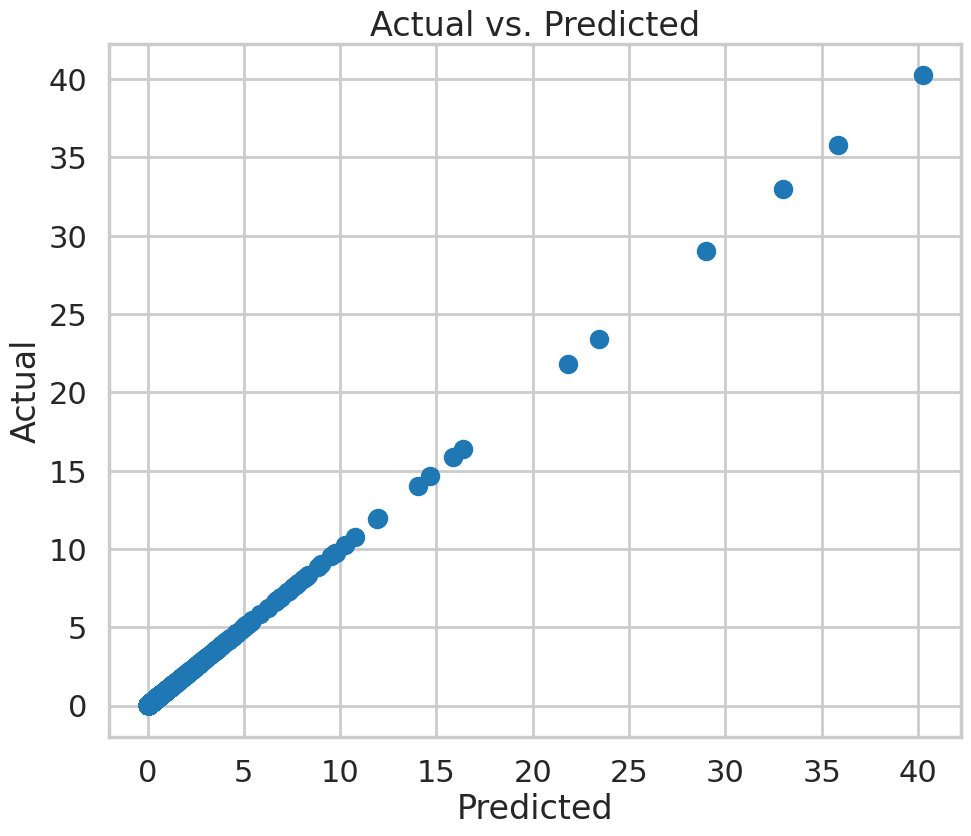

In [20]:
# predict and get result
Ridge_all_results = RidgeModel(x_train,x_test)
#cross validation
cv_score = cross_val_score(Lasso(),x,y,cv=10)
print("Cross-Val Results", cv_score)
print("Cross-Val Mean", cv_score.mean())

Ridge_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() *100})

df_results = df_results.append(Ridge_all_results , ignore_index = True)

# **2-Lasso Regression Model**

In [21]:
#linear Regression Function
def LassoModel(xtrain, xtest):
  #linear Regression Function
  LassoReg = Lasso(alpha= 5.782559402207126e-06)
  #fit the data
  LassoReg.fit(xtrain, y_train)
  #Evaluate the model
  y_pred = LassoReg.predict(xtest)

  print("R2:", r2_score(y_pred, y_test))
  print("MAE:", mean_absolute_error(y_pred, y_test))
  print("MSE:", mean_squared_error(y_pred, y_test))
  print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

  f, ax = plt.subplots(figsize=(11,9))
  plt.scatter(y_pred, y_test)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Actual vs. Predicted")

  return {"R2: ": r2_score(y_pred, y_test)*100,
          "MAE: ": mean_absolute_error(y_pred, y_test),
          "MSE: ": mean_squared_error(y_pred, y_test),
          "RMSE: ": np.sqrt(mean_squared_error(y_pred, y_test))
          }

R2: 0.9999908565986158
MAE: 0.003010461827581031
MSE: 2.6917593908896915e-05
RMSE: 0.005188216833257542
Cross-Val Results [-3.77374328e-01 -1.15152255e+01 -1.27437026e+02 -2.70938087e+02
 -3.91044686e+02 -3.47182698e+02 -1.00247472e+02 -1.92626353e+02
 -3.03398371e+03 -2.40830534e+04]
Cross-Val Mean -2855.8406078787375


<ipython-input-22-95fc12a478f9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(Lasso_all_results , ignore_index = True)


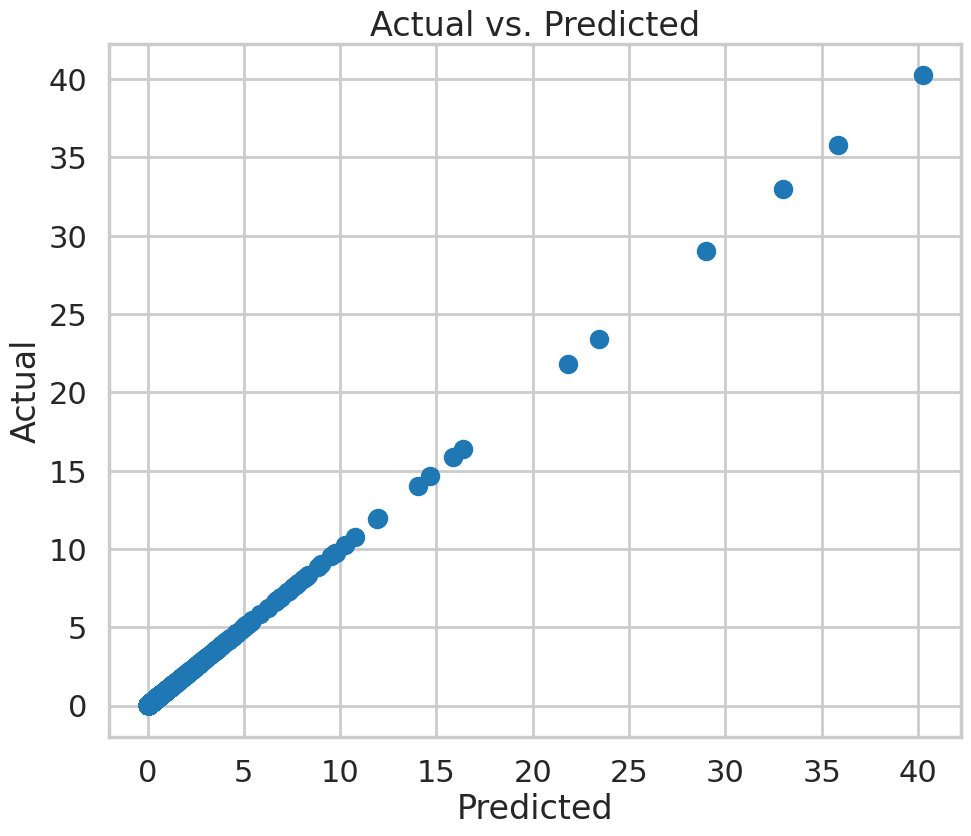

In [22]:
# predict and get result
Lasso_all_results = RidgeModel(x_train,x_test)
#cross validation
cv_score = cross_val_score(Lasso(),x,y,cv=10)
print("Cross-Val Results", cv_score)
print("Cross-Val Mean", cv_score.mean())

Lasso_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() *100})

df_results = df_results.append(Lasso_all_results , ignore_index = True)